### Student Information
Name: 余雅韻

Student ID: 114577002

GitHub ID: yyyynwa

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [434]:
### Begin Assignment Here

---

In [435]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to /Users/irene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [436]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [437]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/irene/Documents/Program/2025_Fall/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.10 (main, Oct 16 2024, 08:56:36) [Clang 18.1.8 ]


---

## 1. The Data

In [438]:
import pandas as pd
newdataset = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

print(newdataset.head(5))

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

## 2. Data Preparation

newdataset_columns = [
  'type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 
  'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 
  'polarity', 'sentiment', 'entities', 'label'
]


In [439]:
# categories
categories = ['Neutral', 'Positive', 'Negative']

In [440]:
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

In [441]:
from sklearn.utils import Bunch

newdataset = Bunch(
    data=df['text'].values,
    titles=df['title'].values,
    target=df['sentiment'].astype(int).values,
    polarity=df['polarity'].values,
    subjectivity=df['subjectivity'].values,
    target_names=categories
) 

In [442]:
newdataset.data[0:2]

array(['Calls on retards',
       'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.'],
      dtype=object)

In [443]:
newdataset.target_names

['Neutral', 'Positive', 'Negative']

In [444]:
len(newdataset.data)

847

In [445]:
len(newdataset.target_names)

3

sentiment	-1	1	0	1	0
label	-1	0	0	1	-1

In [446]:
print("\n".join(newdataset.data[5].split("\n")))

Hoping to ejaculate in wet warm puss tonight, wish me luck


In [447]:
print(newdataset.target_names[int(newdataset.target[0])])

Negative


In [448]:
newdataset.target[0]

np.int64(-1)

In [449]:
newdataset.target[0:10]
#label

array([-1,  1,  0,  1,  0,  1, -1,  1,  1,  0])

In [450]:
for t in newdataset.target[:10]:
    print(newdataset.target_names[t])

Negative
Positive
Neutral
Positive
Neutral
Positive
Negative
Positive
Positive
Neutral


In [451]:
for i in range(5):
    print(f'Example {i+1}')
    print('\n'.join(newdataset.data[i].split('\n')))

Example 1
Calls on retards
Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3
Seeing lots of red in the ticker.
Example 4
Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.

**Highlight Main Points**

* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.
* The feat highlights the power of electric boating and pushes the limits of innovation.
* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.

**TLDR**

Hold onto your seats – Vision Marine Technologies Inc. and Shaun To

In [452]:
for t in newdataset.target[:10]:
    print(newdataset.target_names[t])

Negative
Positive
Neutral
Positive
Neutral
Positive
Negative
Positive
Positive
Neutral


---

## 3. Data Transformation
Transform data into tabular format.

---

### 3.1 Converting Dictionary into Pandas Dataframe

In [453]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(newdataset), columns= ['text'])

In [454]:
len(X)

847

In [455]:
X[0:2]

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...


In [456]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### Adding Columns

In [457]:
# add category to the dataframe
X['category'] = newdataset.target

In [458]:
# add category label
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, newdataset))

In [459]:
X[0:10]

,text,category,category_name
0,Calls on retards,-1,Negative
1,Stunt as in like why did they even make a big ...,1,Positive
2,Seeing lots of red in the ticker.,0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive
4,He didn’t say thank you.,0,Neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Positive
6,Trump will respond to china increasing their t...,-1,Negative
7,Confirmed not a trap. Its been like this for p...,1,Positive
8,Am I the only one seeing the cup & handle brea...,1,Positive
9,HLGN is $10. Hurry and catch it now before it ...,0,Neutral


---

### 3.2 Familiarizing yourself with the Data

To query for the first 10 rows (documents), and keep the `text` and `category_name` attributes or fields.

In [460]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,Calls on retards,Negative
1,Stunt as in like why did they even make a big ...,Positive
2,Seeing lots of red in the ticker.,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,Positive
4,He didn’t say thank you.,Neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",Positive
6,Trump will respond to china increasing their t...,Negative
7,Confirmed not a trap. Its been like this for p...,Positive
8,Am I the only one seeing the cup & handle brea...,Positive
9,HLGN is $10. Hurry and catch it now before it ...,Neutral


#### Let's query the last 10 records

In [461]:
X[-10:]

,text,category,category_name
837,Finance media lying *Surprise*,0,Neutral
838,I am all in,0,Neutral
839,The Art of the Deal…,0,Neutral
840,Lol fr,1,Positive
841,So countries “begging to stop the tariffs” and...,0,Neutral
842,Invest now it is going to shoot up tomorrow,0,Neutral
843,Where can I read this?,0,Neutral
844,"Upgrades, Downgrades [Stock Analyst Recommen...",0,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Neutral
846,![img](emote|t5_2th52|31224),0,Neutral


Build-in function called `loc` allows to explicity define the columns to query.

In [462]:
# using loc (by label)
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

`iloc` function to query a selection dataset by position. 

In [463]:
# using iloc (by position)
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 
Other querying techniques using pandas dataframes.

In [464]:
#Answer here
# to query for the first 10 rows 
print(X.head(10))

# to keep the `text` and `category_name` attributes or fields
print(X.head(10).filter(items=['text', 'category_name']))

# to query the last 10 records
print(X.head(-10))

                                                text  category category_name
0                                   Calls on retards        -1      Negative
1  Stunt as in like why did they even make a big ...         1      Positive
2                  Seeing lots of red in the ticker.         0       Neutral
3  Vision Marine Technologies Inc. is rewriting t...         1      Positive
4                           He didn’t say thank you.         0       Neutral
5  Hoping to ejaculate in wet warm puss tonight, ...         1      Positive
6  Trump will respond to china increasing their t...        -1      Negative
7  Confirmed not a trap. Its been like this for p...         1      Positive
8  Am I the only one seeing the cup & handle brea...         1      Positive
9  HLGN is $10. Hurry and catch it now before it ...         0       Neutral
                                                text category_name
0                                   Calls on retards      Negative
1  Stunt as in like

---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the category, and query every 10th record. Only show the first 5 records.

In [465]:
# Answer here
X[X['category_name']=='Positive'][::10][0:5]

,text,category,category_name
1,Stunt as in like why did they even make a big ...,1,Positive
25,"You see, Target, pissing off a good chunk of y...",1,Positive
56,"To be fair, Chinese exports to the US make up ...",1,Positive
73,"Look, the USA somehow thought a second term f...",1,Positive
96,200k loss in a month.. haha,1,Positive


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

Add the dummy records with missing values

In [466]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


`isnull` function looks through the entire dataset for null values and returns `True` 

In [467]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


---

### >>> **Exercise 4 (Watch Video):** 
To calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [468]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

---

Insert some dummy data into the dataframe and test the reliability of the function.
`Series` basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). 

In [469]:
# Axis labels called "index"
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [470]:
dummy_series

text        dummy_record
category               1
dtype: object

In [471]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,category
0,dummy_record,1


In [472]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [473]:
# check if the records was commited into result
len(result_with_series)

848

Add the record with some missing values.
Detect that there is a missing value on the resulting dataframe or not.

In [474]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


Insert a simple dictionary directly into the dataframe `X`. 

In [475]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [476]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [477]:
len(X)

848

In [478]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


The code to drop the record with missing.

In [479]:
X.dropna(inplace=True)

In [480]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [481]:
len(X)

847

---

### 4.2 Dealing with Duplicate Data

Check how many duplicates in the current dataset. 
Similar to the `isnull` function used to check for missing values. 

In [482]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

Check the sum of duplicate records:

In [483]:
sum(X.duplicated())

23

all the `duplicated()` operation check per records instead of per column. 

In [484]:
sum(X.duplicated('text'))

23

Create some duplicated dummy records and append it to the main dataframe `X`.

In [485]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [486]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [487]:
len(X)

849

In [488]:
sum(X.duplicated())

24

To get rid of all the duplicated records without preserving a copy. 

In [489]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [490]:
len(X)

813

---

## 5.  Data Preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling

In [491]:
X_sample = X.sample(n=600) #random state

In [492]:
len(X_sample)

600

In [493]:
X_sample[0:4]

,text,category,category_name
556,Cheeto Trumpedo to you!,0,Neutral
54,"You know what, as an American. I hope china co...",1,Positive
281,What are we gonna call it when Wendy's is gone.,0,Neutral
245,Let him take it all and much more. I want his ...,-1,Negative


---

In [494]:
X_sample[0:10]

,text,category,category_name
556,Cheeto Trumpedo to you!,0,Neutral
54,"You know what, as an American. I hope china co...",1,Positive
281,What are we gonna call it when Wendy's is gone.,0,Neutral
245,Let him take it all and much more. I want his ...,-1,Negative
623,Trump is using “Art of the Deal” tactics. X...,0,Neutral
512,moving money quickly from us to his own pockets,1,Positive
688,Enter the ticker for which you want the techn...,0,Neutral
327,Yippee..... If the US dollar goes to zero then...,1,Positive
460,"Recent strong stock performance, with capital ...",1,Positive
203,Thanks for the heads up.,1,Positive


In [495]:
X[0:10]

,text,category,category_name
0,Calls on retards,-1,Negative
1,Stunt as in like why did they even make a big ...,1,Positive
2,Seeing lots of red in the ticker.,0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive
4,He didn’t say thank you.,0,Neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Positive
6,Trump will respond to china increasing their t...,-1,Negative
7,Confirmed not a trap. Its been like this for p...,1,Positive
8,Am I the only one seeing the cup & handle brea...,1,Positive
9,HLGN is $10. Hurry and catch it now before it ...,0,Neutral


### >>> Exercise 6 (take home):
Any changes from the `X` dataframe to the `X_sample` dataframe? 

In [496]:
# Answer here
# 1. Numbers of rows: X contains all data from 0 to 847, but X_sample randomly selects 600 data and then returning 600 rows.
# 2. Order of rows: X follows the original data order, and X_sample be selected randomly so it gets random row order.

---

The distribution of categories in both the sample and original dataset.
Visualize and analyze the disparity between the two datasets by using `matplotlib` python library. 

In [497]:
import matplotlib.pyplot as plt
%matplotlib inline

In [498]:
categories

['Neutral', 'Positive', 'Negative']

category_name
Positive    315
Neutral     303
Negative    195
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

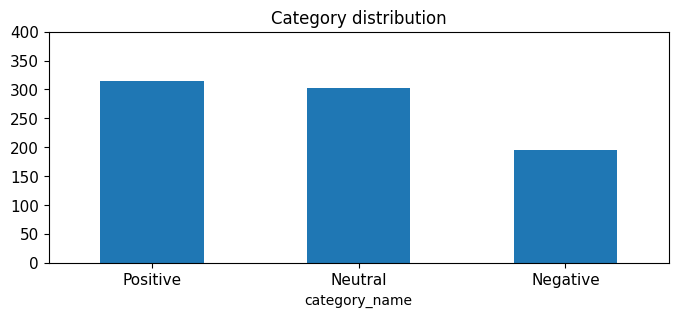

In [499]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 400],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
Positive    235
Neutral     222
Negative    143
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

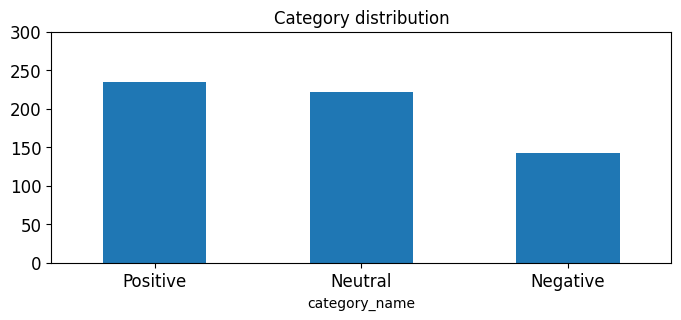

In [500]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 7 (Watch Video):**
`ylim` parameters the maximum value for y.

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

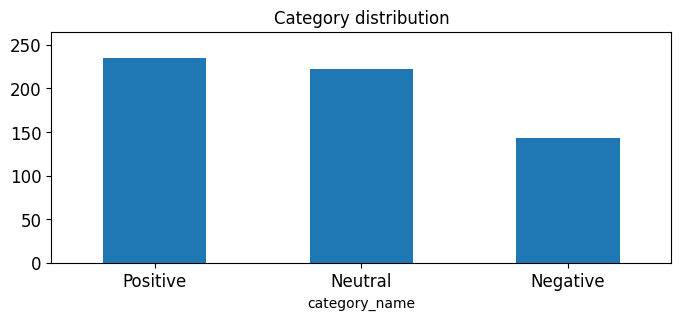

In [501]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
Side-by-side comparison of the distribution between the two datasets.

In [502]:
# Answer here
print(X.category_name.value_counts())
print(X_sample.category_name.value_counts())

category_name
Positive    315
Neutral     303
Negative    195
Name: count, dtype: int64
category_name
Positive    235
Neutral     222
Negative    143
Name: count, dtype: int64


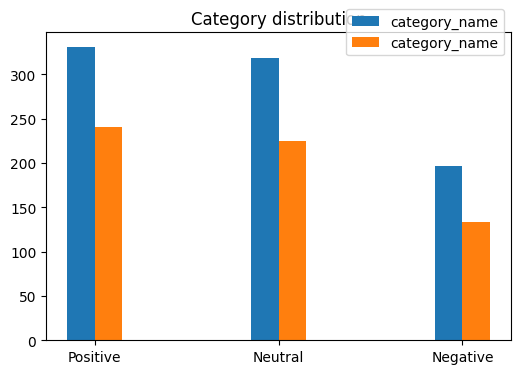

In [503]:
xlabel = ['Positive', 'Neutral', 'Negative']
X_count = [331, 319, 197]
X_sample_count = [241, 225, 134]
# setting where label located
xlabel_location = np.arange(len(xlabel))
bar_width = 0.15

plt.figure(figsize = (6,4))
plt.bar(xlabel_location, X_count, width = bar_width, label = 'category_name')
plt.bar(xlabel_location + bar_width ,X_sample_count, width = bar_width, label = 'category_name')
# Let x-axis label align middle
plt.xticks(xlabel_location + bar_width/2, xlabel)
plt.title('Category distribution')
# Setting where label-icon located
plt.legend(bbox_to_anchor=(1,1), loc='center right')
plt.show()

# This barchart is follow matplotlib guides: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

---

### 5.2 Feature Creation

NLTK library to conduct tokenization in splitting a sentence into its individual components(as words, emojis, emails, etc.) 

Call the `nltk` library as follows:

    ```python
    import nltk
    ```

In [504]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/irene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/irene/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [505]:
# takes a like a minute or two to process

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [506]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

New columns `unigrams` contains an array of tokens, which were extracted from the original `text` field. 

In [507]:
X[0:4]

,text,category,category_name,unigrams
0,Calls on retards,-1,Negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1,Positive,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [508]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

---

### 5.3 Feature subset selection

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Use scikit learn built in functionalities to generate this document. 

In [509]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


Examples of what each feature is based on their index in the vector

In [510]:
count_vect.get_feature_names_out()[666]

'burgeoning'

In [511]:
count_vect.get_feature_names_out()[1111]

'deleted'

In [512]:
count_vect.get_feature_names_out()[3333]

'scenario'

Built-in, default tokenizer (often referred to as an `analyzer`) and then produces the word frequency vector for each document. 
Default analyzer provided by `CountVectorizer` to keep things tidy and minimal.

In [513]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (Watch Video):**
Analyze the first record of our X dataframe with the new analyzer.

In [514]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['calls', 'on', 'retards']

---

Now let us look at the term-document matrix we built above.

In [515]:
# We can check the shape of this matrix by:
X_counts.shape

(813, 4313)

In [516]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

`fit_transform` and `CountVectorizer` learn the vocabulary dictionary and returns a term-document matrix.

To extract the first five articles and transform them into document-term matrix.

In [517]:
X_counts.shape

(813, 4313)

In [518]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [519]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

Heat map of the term-document matrix to better analyze data or transformation.

In [520]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [521]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [522]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

For the heat map, use `seaborn` built on top of matplotlib and closely integrated with pandas data structures.

![alt txt](https://i.imgur.com/1isxmIV.png)

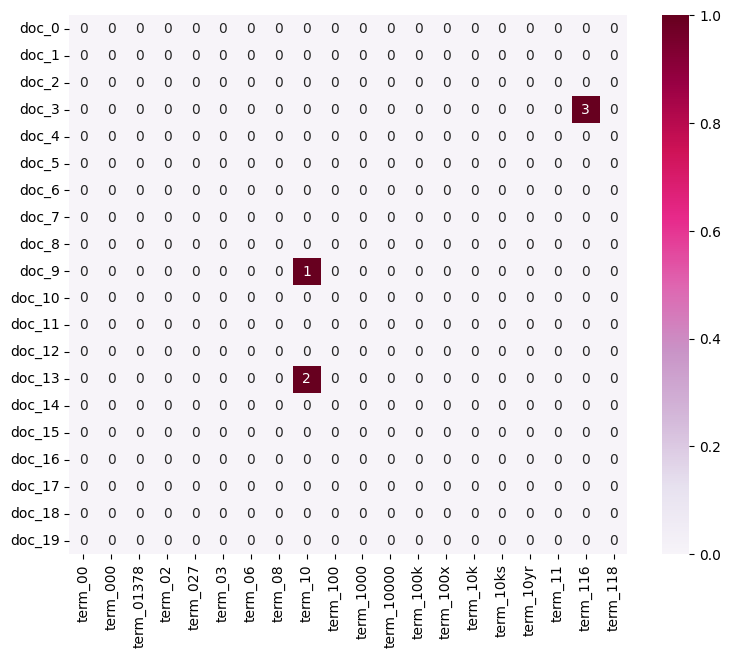

In [523]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### **>>> Exercise 11 (take home):** 
Try to modify the code above to plot the entire term-document matrix or just a sample of it. 

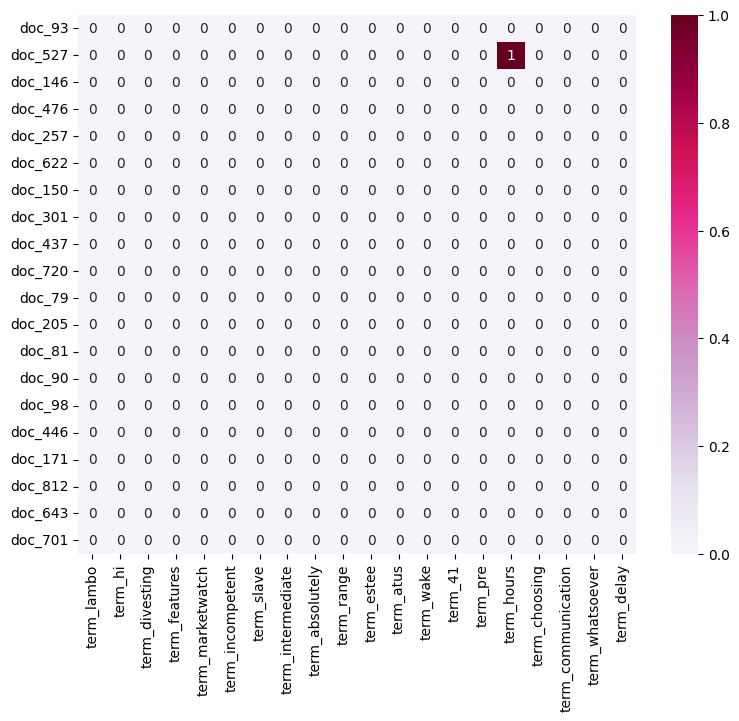

In [524]:
# Answer here
# When it says "there is a lot of words in the vocab", a helpful way to deal with it is dimension reduction.
# So I won't plot the entire term-document matrix but just part of it.

# With random sample selection:

import random # Randomly select samples 

# Select documents
random_doc = random.sample(range(len(X.index)), 20)
# Select terms
random_feature = random.sample(range(len(count_vect.get_feature_names_out())), 20)

plot_x = ["term_" + str(count_vect.get_feature_names_out()[i]) for i in random_feature]
plot_y = ["doc_" + str(X.index[i]) for i in random_doc]
plot_z = X_counts[random_doc][:, random_feature].toarray()  # X_counts[which documents, which terms]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show() # Exercise11_homework.png

---

### 5.4 Attribute Transformation / Aggregation
To explore the data first before making any premature conclusions. 
Ttake the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words.

###  5.4.1 Transform Text Data

To compute these frequencies for each term in all documents. 
To add values of the 2D matrix, vertically; i.e., sum of each column. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [525]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [526]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [527]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



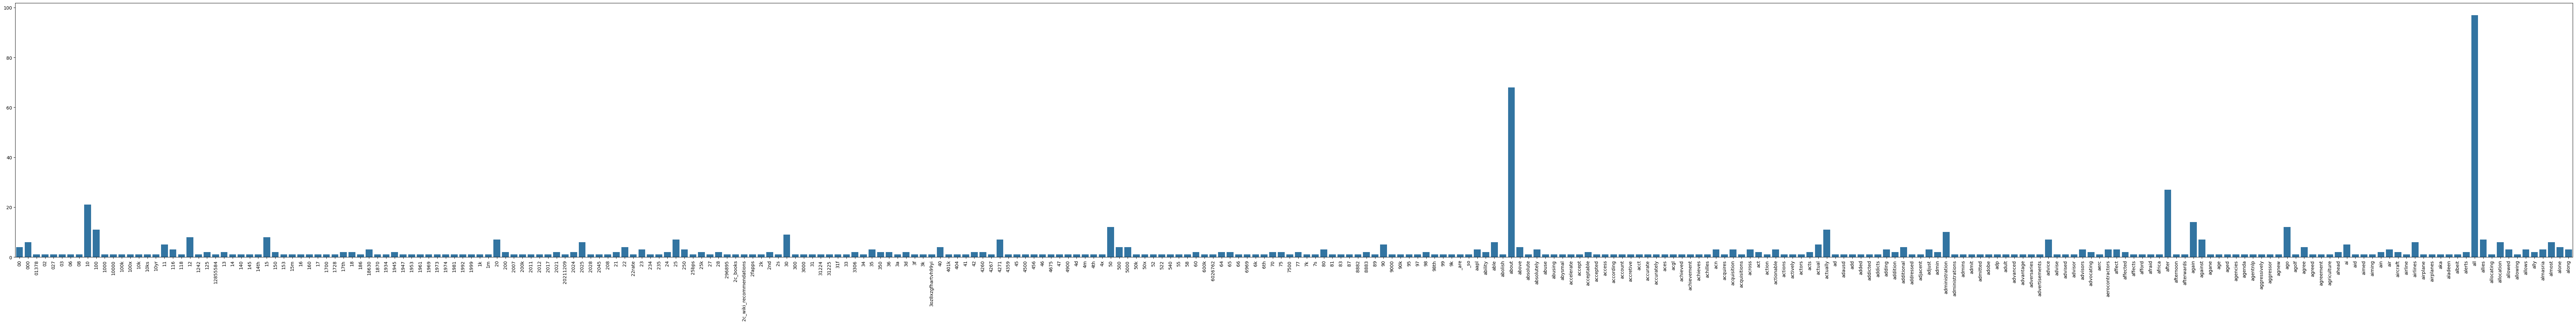

In [528]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 12 (take home):**
Use plotly to achieve a interactive visualization.

In [529]:
! pip install plotly

DEPRECATION: Loading egg at /Users/irene/anaconda3/lib/python3.11/site-packages/Pfeature-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [530]:
# Answer here
# Install and use plotly  
# Reference: https://plotly.com/python/bar-charts/ & https://plotly.com/python/reference/layout/
import plotly.express as px

# Compute frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Construct dataframe with terms and their calculating frequencies
df_use_plotly_ex12 = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[:300], "Term_Frequencies": term_frequencies[:300]})

# Follow plotly usage
fig_ex12 = px.bar(df_use_plotly_ex12, 
             x = "Terms", 
             y = "Term_Frequencies",
             title = "Exercise_12")
fig_ex12.update_layout(xaxis_tickangle = -90, width = 2500, height = 600) 
# Let label of x-axis rotation like the demo
# Setting figure size to avoid all things stacking together

fig_ex12.show()

---

### >>> **Exercise 13 (take home):** 
Reduce the number of terms to visualize as an exercise. 


In [531]:
# Answer here
# To reduce the number of terms
# I set up a threshold to filter the lower frequency terms
# And then plot the frequency figure about the left terms
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Set a minimum frequency threshold to reduce number of terms
min_frequency = 20
print("Setting threshold:", (min_frequency))

# Keep frequency of terms meeting the threshold
frequency_th = term_frequencies >= min_frequency

# Filter terms and frequencies from threshold
filter_terms = count_vect.get_feature_names_out()[frequency_th]
filter_frequencies = term_frequencies[frequency_th]
print(f"Remaining terms: {len(filter_terms)}")

df_use_plotly_ex13 = pd.DataFrame({"Terms": filter_terms, "Term_Frequencies": filter_frequencies})

fig_ex13 = px.bar(df_use_plotly_ex13, 
             x = "Terms", 
             y = "Term_Frequencies",
             title = "Exercise_13")

fig_ex13.update_layout(xaxis_tickangle = -90, width = 2500, height = 600)

fig_ex13.show()

# (Thershold, remain terms): (15, 202), (10, 310), (20, 145)

Setting threshold: 20
Remaining terms: 138


---

### >>> **Exercise 14 (take home):** 
Sort the terms on the `x-axis` by frequency instead of in alphabetical order. 

In [532]:
# Answer here
# Sort the terms on the `x-axis` by frequency instead of in alphabetical order
# "term_frequencies" can be used for feature selection to reduce the number of terms
# It can be assumed that higher frequencies indicate terms with greater importance
# By selecting first 300 high frequency terms: 
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Selecting and ranking
first_n_terms = 300
first_n_indices = np.argsort(term_frequencies)[-first_n_terms:][::-1]

df_use_plotly_ex14 = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[first_n_indices], "Term_Frequencies" :term_frequencies[first_n_indices]})

fig_ex14 = px.bar(df_use_plotly_ex14, 
             x = "Terms", 
             y = "Term_Frequencies",
             title = "Exercise_14")

fig_ex14.update_layout(xaxis_tickangle = -90, width = 2500, height = 600)

fig_ex14.show()

---

Transform the values in that vector into the log distribution. 
Import the `math` library apply it to the array of values of the term frequency vector. 

In [533]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



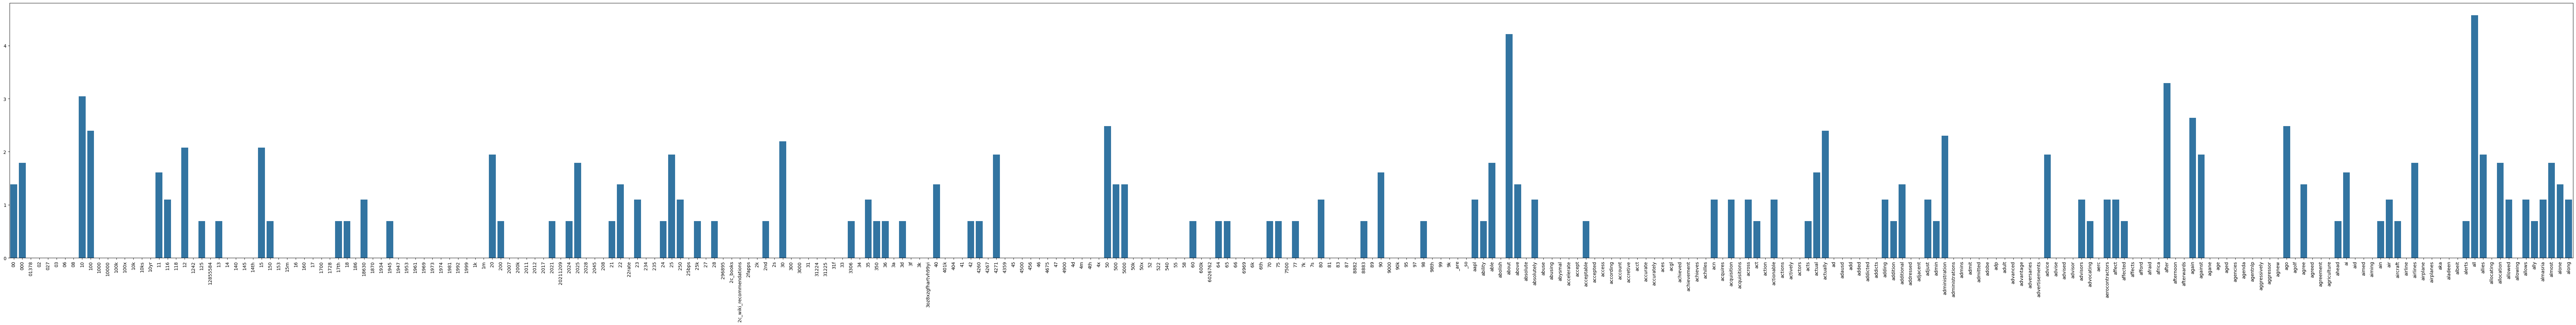

In [534]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
From the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log'
Comment about the differences and other possible insights that can get from a log distribution.

In [535]:
# Answer here
# Plot in alphabetical order
term_frequencies_log = [math.log(i) for i in term_frequencies]

df_use_plotly_ex15 = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[:300], 
                                   "Term_Frequencies_Log": term_frequencies_log[:300]})

fig_ex15 = px.bar(df_use_plotly_ex15, 
             x = "Terms", 
             y = "Term_Frequencies_Log",
             title = "Exercise_15")
fig_ex15.update_layout(xaxis_tickangle = -90, width = 2500, height = 1000) 

fig_ex15.show()

# Plot by ranking frequency (like fig_ex14)
first_n_terms = 3000 # Select more terms to see the differences overall
first_n_indices = np.argsort(term_frequencies_log)[-first_n_terms:][::-1]
term_frequencies_log = np.array(term_frequencies_log)

df_use_plotly_ex15_2 = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[first_n_indices], 
                                     "Term_Frequencies_Log": term_frequencies_log[first_n_indices]})

fig_ex15_2 = px.bar(df_use_plotly_ex15_2, 
             x = "Terms", 
             y = "Term_Frequencies_Log",
             title = "Exercise_15_2")

fig_ex15_2.update_layout(xaxis_tickangle = -90, width = 8000, height = 800)

fig_ex15_2.show()


What are the differences by changing 'term_frequencies' to 'term_frequencies_log'?

        1. smaller scale range within higher and lower frequency terms

        2. the visualization shows smoother transition (without a suddenly drop-off)


What info. can get from a log distribution?

        1. provide a more normal distribution by normalized the extreme values (become better statistical properties)

        2. another perspective to analyze the relative importance of the terms

End of Phase 1

The phase 1 exercises and homeworks should be committed and submitted before September 28th

# Phase 2

In [536]:
### Begin Assignment Here

###  5.4.2 Finding frequent patterns

In [537]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [538]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category Negative:


,01378,027,10,100,100k,100x,11,12,125,13,...,yields,yikes,yippee,yo,you,your,yourselves,youtube,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


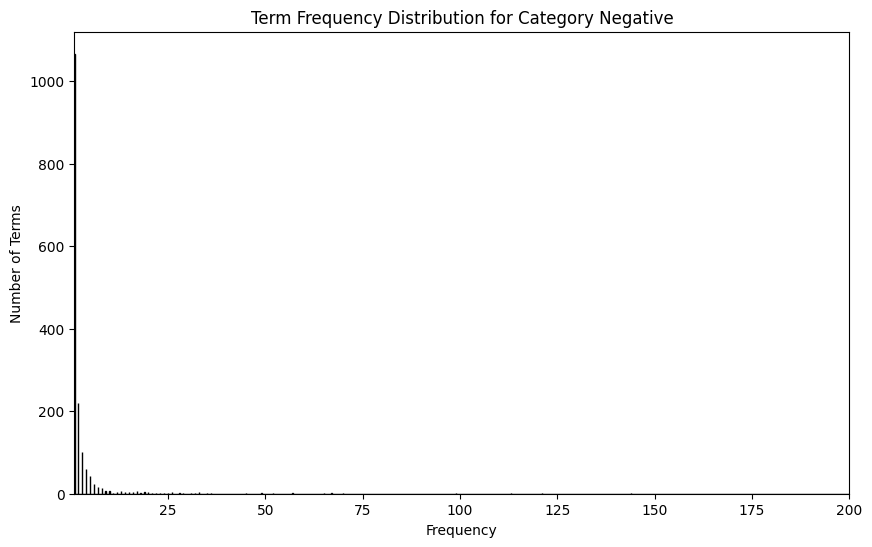

In [539]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [540]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: Negative
Number of terms in top 5%: 81
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'in', 'of', 'that', 'this', 'you', 'for', 'he', 'trump', 'are', 'if', 'be', 'on', 'they', 'so', 'will', 'but', 'as', 'with', 'can', 'not', 'just', 'us', 'what', 'have', 'like', 'at', 'all', 'was', 'his', 'my', 'about', 'think', 'an', 'now', 'or', 'people', 'even', 're', 'has', 'their', 'china', 'we', 'when', 'going', 'no', 'more', 'tariffs', 'fuck', 'bad', 'him', 'up', 'than', 'money', 'there', 'market', 'do', 'see', 'from', 'how', 'only', 'by', 'out', 'one', 'go', 'why', 'shit', 'me', 'silver', 'still', 'long', 'down', 'want', 'make', 'time', 'economy', 'too']


Frequencies of the **top 5%** words:

In [541]:
sorted_counts #We can see the frequencies sorted in a descending order

array([234, 144, 121, ...,   1,   1,   1])

In [542]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([1419, 1454,   99, ...,  962,  963,    0])

In [543]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(234)

In [544]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Negative
Number of terms in bottom 1%: 16
Filtered terms: ['01378', 'necessary', 'nearly', 'naw', 'navarro', 'nation', 'nasdaq', 'name', 'nah', 'myself', 'musky', 'multikine', 'moves', 'move', 'mostly', 'monthly']


Frequencies of the **bottom 1%** words:

In [545]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 121, 144, 234])

In [546]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   0,  963,  962, ...,   99, 1454, 1419])

In [547]:
filt_term_document_dfs[categories[category_number]].loc[:,'nasdaq'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

np.int64(1)

In [548]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category Negative we filter the following words:
Bottom 1.0% words: 
01378        1
necessary    1
nearly       1
naw          1
navarro      1
nation       1
nasdaq       1
name         1
nah          1
myself       1
musky        1
multikine    1
moves        1
move         1
mostly       1
monthly      1
dtype: int64
Top 5.0% words: 
too          9
economy      9
time         9
make         9
want         9
          ... 
it          99
is         113
and        121
to         144
the        234
Length: 81, dtype: int64

For category Positive we filter the following words:
Bottom 1.0% words: 
kiss             1
monopoly         1
monetary         1
momentum         1
moment           1
modular          1
modern           1
moderators       1
models           1
modelling        1
model            1
mitigate         1
mitch            1
mistakes         1
mission          1
misguided        1
miran            1
minimizes        1
meow             1
mercedes         1
message     

,027,10,100,100k,100x,11,12,125,13,140,...,yet,yields,yikes,yippee,yo,your,yourselves,youtube,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [549]:
# Answer here
print("""
Similarities:
      1. Top 5% filtered words are mainly common stopwords (like 'the', 'to', 'of', 'and', 'in', 'is', 'for', 'that', etc.)
      2. Bottom 1% filtered words in all categories are extremely rare words
      3. Bottom 1% often represents the unique vocabulary and context of each category
Differences:
      1. The specific words filtered in the top 5% and bottom 1% differ across categories
      2. Bottom 1% often represents the unique vocabulary and context of each category
      3. Each category has its own category-specific technical terms that appear in the filtering
""")


Similarities:
      1. Top 5% filtered words are mainly common stopwords (like 'the', 'to', 'of', 'and', 'in', 'is', 'for', 'that', etc.)
      2. Bottom 1% filtered words in all categories are extremely rare words
      3. Bottom 1% often represents the unique vocabulary and context of each category
Differences:
      1. The specific words filtered in the top 5% and bottom 1% differ across categories
      2. Bottom 1% often represents the unique vocabulary and context of each category
      3. Each category has its own category-specific technical terms that appear in the filtering



In [550]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 194
Number of items : 1531
Minimum Transaction Size : 1
Average Transaction Size : 12.989690721649485
Maximum Transaction Size : 67
Standard Deviation Transaction Size : 10.839974555226371
Variance in Transaction Sizes : 118.1138828054057
Sparsity : 0.991515551455487


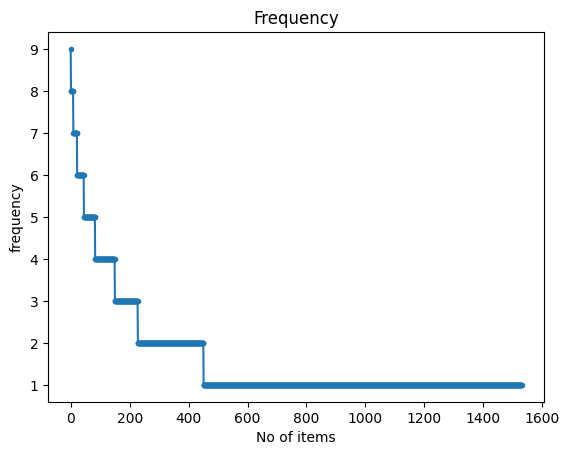

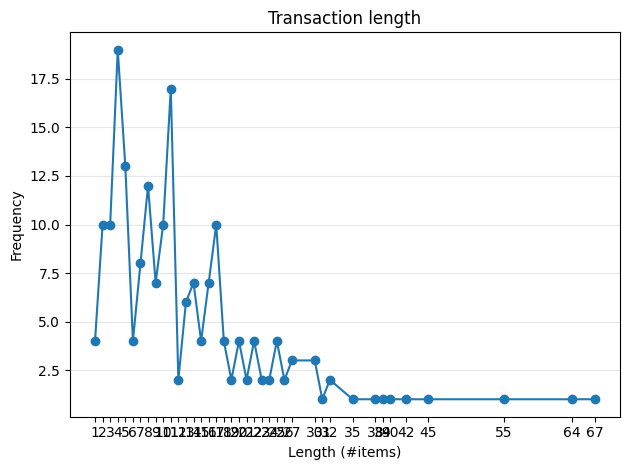

In [551]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 313
Number of items : 2922
Minimum Transaction Size : 1
Average Transaction Size : 16.38658146964856
Maximum Transaction Size : 198
Standard Deviation Transaction Size : 22.28527097369826
Variance in Transaction Sizes : 498.225075776194
Sparsity : 0.9943919981281149


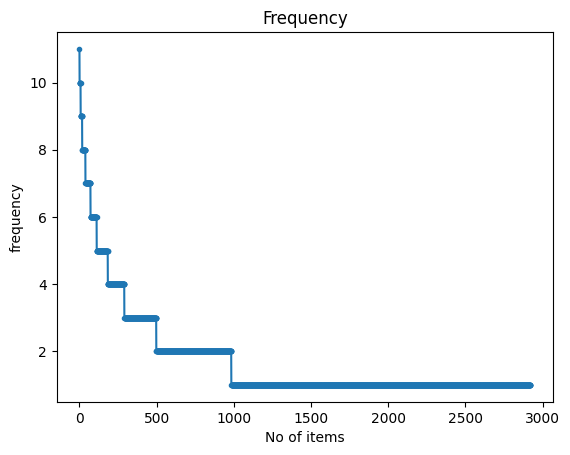

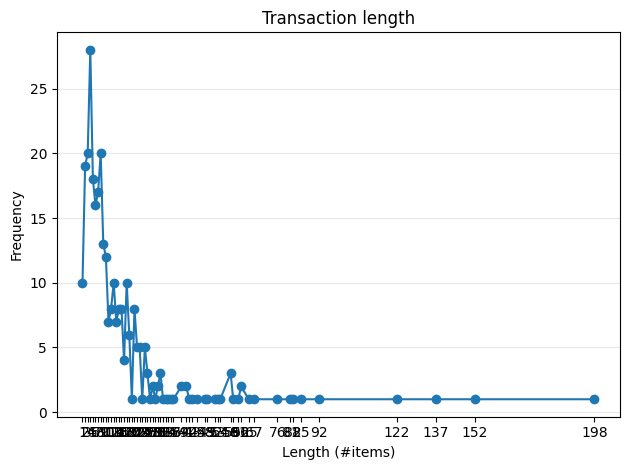

In [552]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 296
Number of items : 1166
Minimum Transaction Size : 1
Average Transaction Size : 5.993243243243243
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 4.8740856684095
Variance in Transaction Sizes : 23.837242327072836
Sparsity : 0.9948599972184878


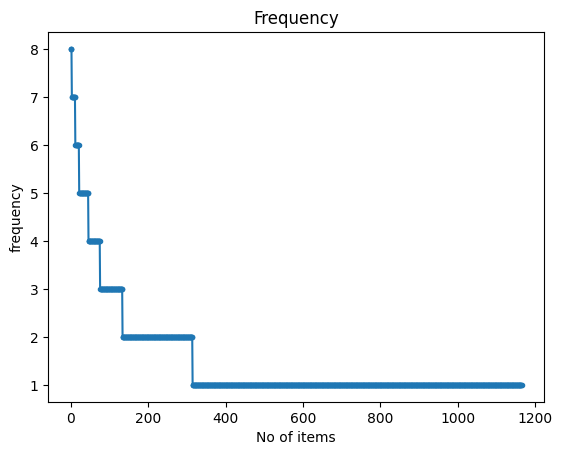

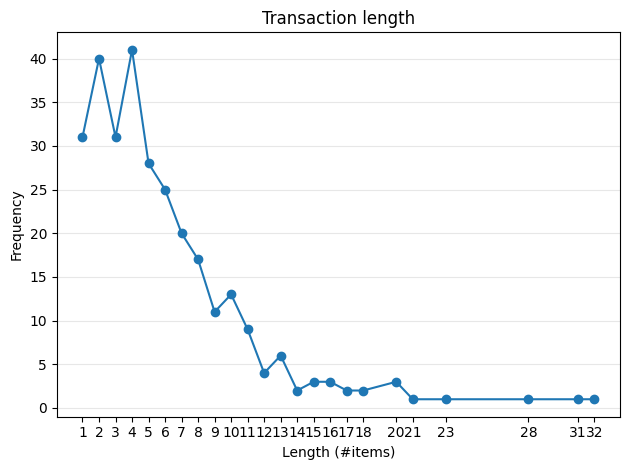

In [553]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [554]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 45
Runtime: 0.0016629695892333984


In [555]:
obj1.save('freq_patterns_negative_minSup6.txt') #save the patterns
frequentPatternsDF_negative

,Patterns,Support
0,retard,6
1,investment,6
2,seems,6
3,without,6
4,life,6
5,man,6
6,does,6
7,idiot,6
8,least,6
9,over,6


In [556]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj2 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_positive= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 112
Runtime: 0.003158092498779297


In [557]:
obj2.save('freq_patterns_positive_minSup6.txt') #save the patterns
frequentPatternsDF_positive

,Patterns,Support
0,ever,6
1,months,6
2,end,6
3,actually,6
4,target,6
...,...,...
107,where,10
108,america,10
109,thanks,10
110,everyone,10


In [558]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj3 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_neutral= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 23
Runtime: 0.0008440017700195312


In [559]:
obj3.save('freq_patterns_neutral_minSup6.txt') #save the patterns
frequentPatternsDF_neutral

,Patterns,Support
0,call,6
1,com,6
2,news,6
3,stockbuyvest,6
4,stockbuyvest\tcom,6
5,re,6
6,anything,6
7,already,6
8,by,6
9,out,6


In [560]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_positive, frequentPatternsDF_neutral]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
119    pretty       10
121   someone       10
120   country       10
124    thanks       10
123   america       10
..        ...      ...
40   recently        6
39       next        6
38       debt        6
37       cash        6
0      retard        6

[138 rows x 2 columns]
Number of patterns discarded: 42


In [561]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,little,inflation,worth,whole,take,recently,next,debt,cash,retard
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. 

In [568]:
# Answer Here
# FAE Top-K, with k = [50, 100, 150], recording the runtime for each
from PAMI.frequentPattern.topk import FAE  as alg
# k = 50
obj_50 = alg.FAE(iFile='td_freq_db_negative.csv', k=50)
obj_50.mine()
frequentPatternsDF_50 = obj_50.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_50)))
print('Runtime: ' + str(obj_50.getRuntime()))
obj_50.save('freq_patterns_negative_topk_50.txt')
print("Top k=50 (first 10):")
print(frequentPatternsDF_50.head(10))

# k= 100
obj_100 = alg.FAE(iFile='td_freq_db_negative.csv', k=100)
obj_100.mine()
frequentPatternsDF_100 = obj_100.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_100)))
print('Runtime: ' + str(obj_100.getRuntime()))
obj_100.save('freq_patterns_negative_topk_100.txt')
print("Top k=100 (first 10):")
print(frequentPatternsDF_100.head(10))

# k = 150
obj_150 = alg.FAE(iFile='td_freq_db_negative.csv', k=150)
obj_150.mine()
frequentPatternsDF_150 = obj_150.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_150)))
print('Runtime: ' + str(obj_150.getRuntime()))
obj_150.save('freq_patterns_negative_topk_150.txt')
print("Top k=150 (first 10):")
print(frequentPatternsDF_150.head(10))

# MaxFPGrowth, minSup = [3, 6, 9] and noting the runtime
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg
# minSup = 3
obj_m3 = alg.MaxFPGrowth(iFile='td_freq_db_negative.csv', minSup=3)
obj_m3.mine()
frequentPatternsDF_m3 = obj_m3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_m3)))
print('Runtime: ' + str(obj_m3.getRuntime()))
obj_m3.save('max_freq_patterns_negative_minSup3.txt')
print("MaxFPGrowth minSup=3 (first 10):")
print(frequentPatternsDF_m3.head(10))           

# minSup = 6
obj_m6 = alg.MaxFPGrowth(iFile='td_freq_db_negative.csv', minSup=6)
obj_m6.mine()
frequentPatternsDF_m6 = obj_m6.getPatternsAsDataFrame()          
print('Total No of patterns: ' + str(len(frequentPatternsDF_m6)))
print('Runtime: ' + str(obj_m6.getRuntime()))
obj_m6.save('max_freq_patterns_negative_minSup6.txt')
print("MaxFPGrowth minSup=6 (first 10):")
print(frequentPatternsDF_m6.head(10))

# minSup = 9
obj_m9 = alg.MaxFPGrowth(iFile='td_freq_db_negative.csv', minSup=9)
obj_m9.mine()
frequentPatternsDF_m9 = obj_m9.getPatternsAsDataFrame()          
print('Total No of patterns: ' + str(len(frequentPatternsDF_m9)))
print('Runtime: ' + str(obj_m9.getRuntime()))
obj_m9.save('max_freq_patterns_negative_minSup9.txt')
print("MaxFPGrowth minSup=9 (first 10):")
print(frequentPatternsDF_m9.head(10))

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 50
Runtime: 0.0051631927490234375
Top k=50 (first 10):
  Patterns  Support
0      our        9
1      who        8
2    doing        8
3     been        8
4     them        8
5    after        8
6      get        8
7    worse        8
8      don        8
9      few        7
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.0031502246856689453
Top k=100 (first 10):
  Patterns  Support
0      our        9
1      who        8
2    doing        8
3     been        8
4     them        8
5    after        8
6      get        8
7    worse        8
8      don        8
9      few        7
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 150
Runtime: 0.005995988845825195
Top k=150 (first 10):
  Patterns  Support
0      our        9
1      who        8
2    doing        8
3     been        8
4     t

|             | FAE (Top-K)                                  | MaxFPGrowth                                | FPGrowth                                       |
|-------------|----------------------------------------------|--------------------------------------------|------------------------------------------------|
| Runtime     | Depends on k value                           | Higher minSup = faster                     | Higher minSup = faster                         |
|             | Lower k = faster execution                   | Faster than FPGrowth due to fewer patterns |                                                |
| Pattern     |  Most frequent patterns with exactly k value | Only maximal frequent patterns             | All frequent patterns meeting minSup threshold |
| Performance | Giving the most frequent k patterns in order | Lower minSup produces more patterns        |                                                |
|             |                                              | Finding for longest/largest patterns       |                                                |


### 5.5 Dimensionality Reduction
- **Principal Component Analysis (PCA)**

- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**:
        
- **Uniform Manifold Approximation and Projection (UMAP)**:

In [569]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [570]:
X_pca_tdm.shape

(813, 2)

In [571]:
X_tsne_tdm.shape

(813, 2)

In [572]:
X_umap_tdm.shape

(813, 2)

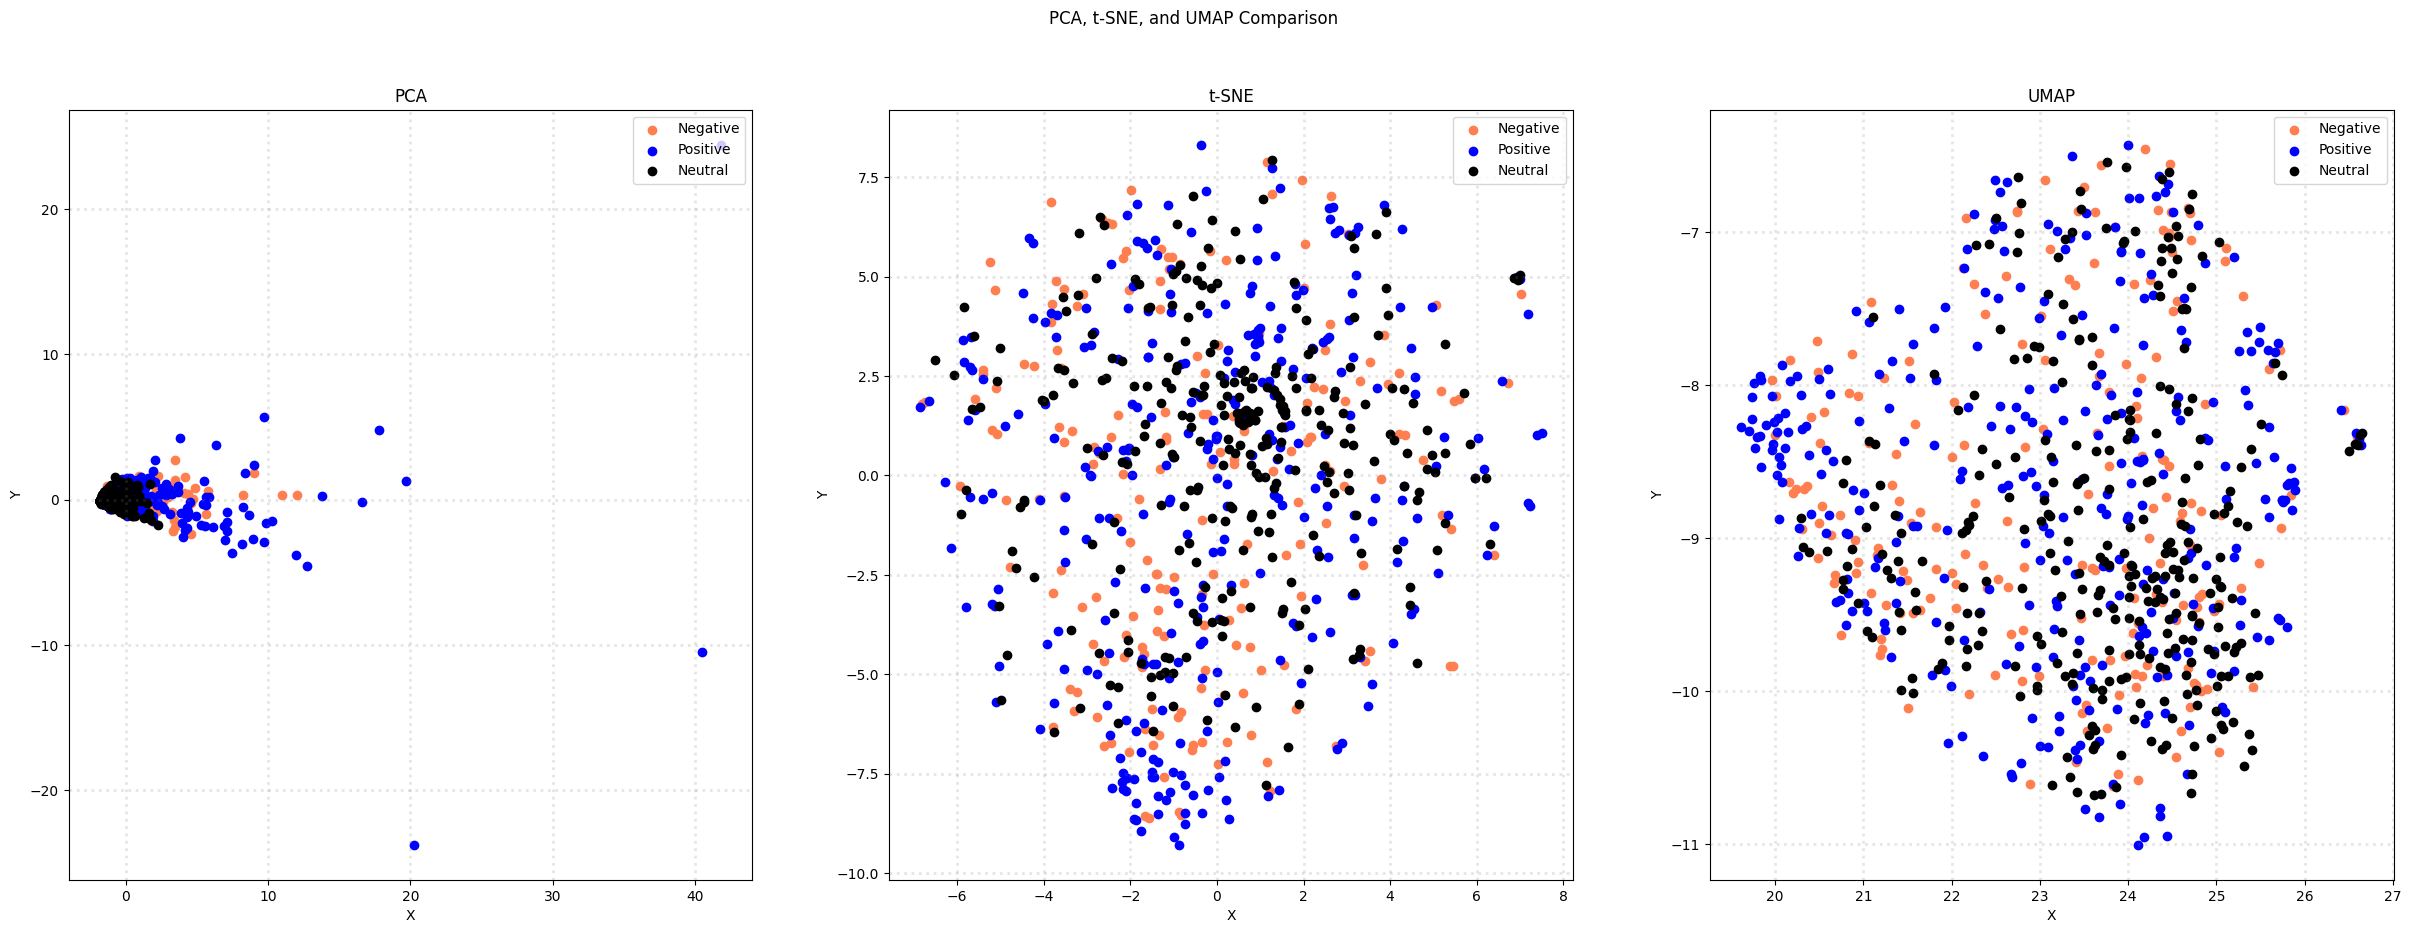

In [573]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [574]:
# This might take a couple of minutes to execute
# Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

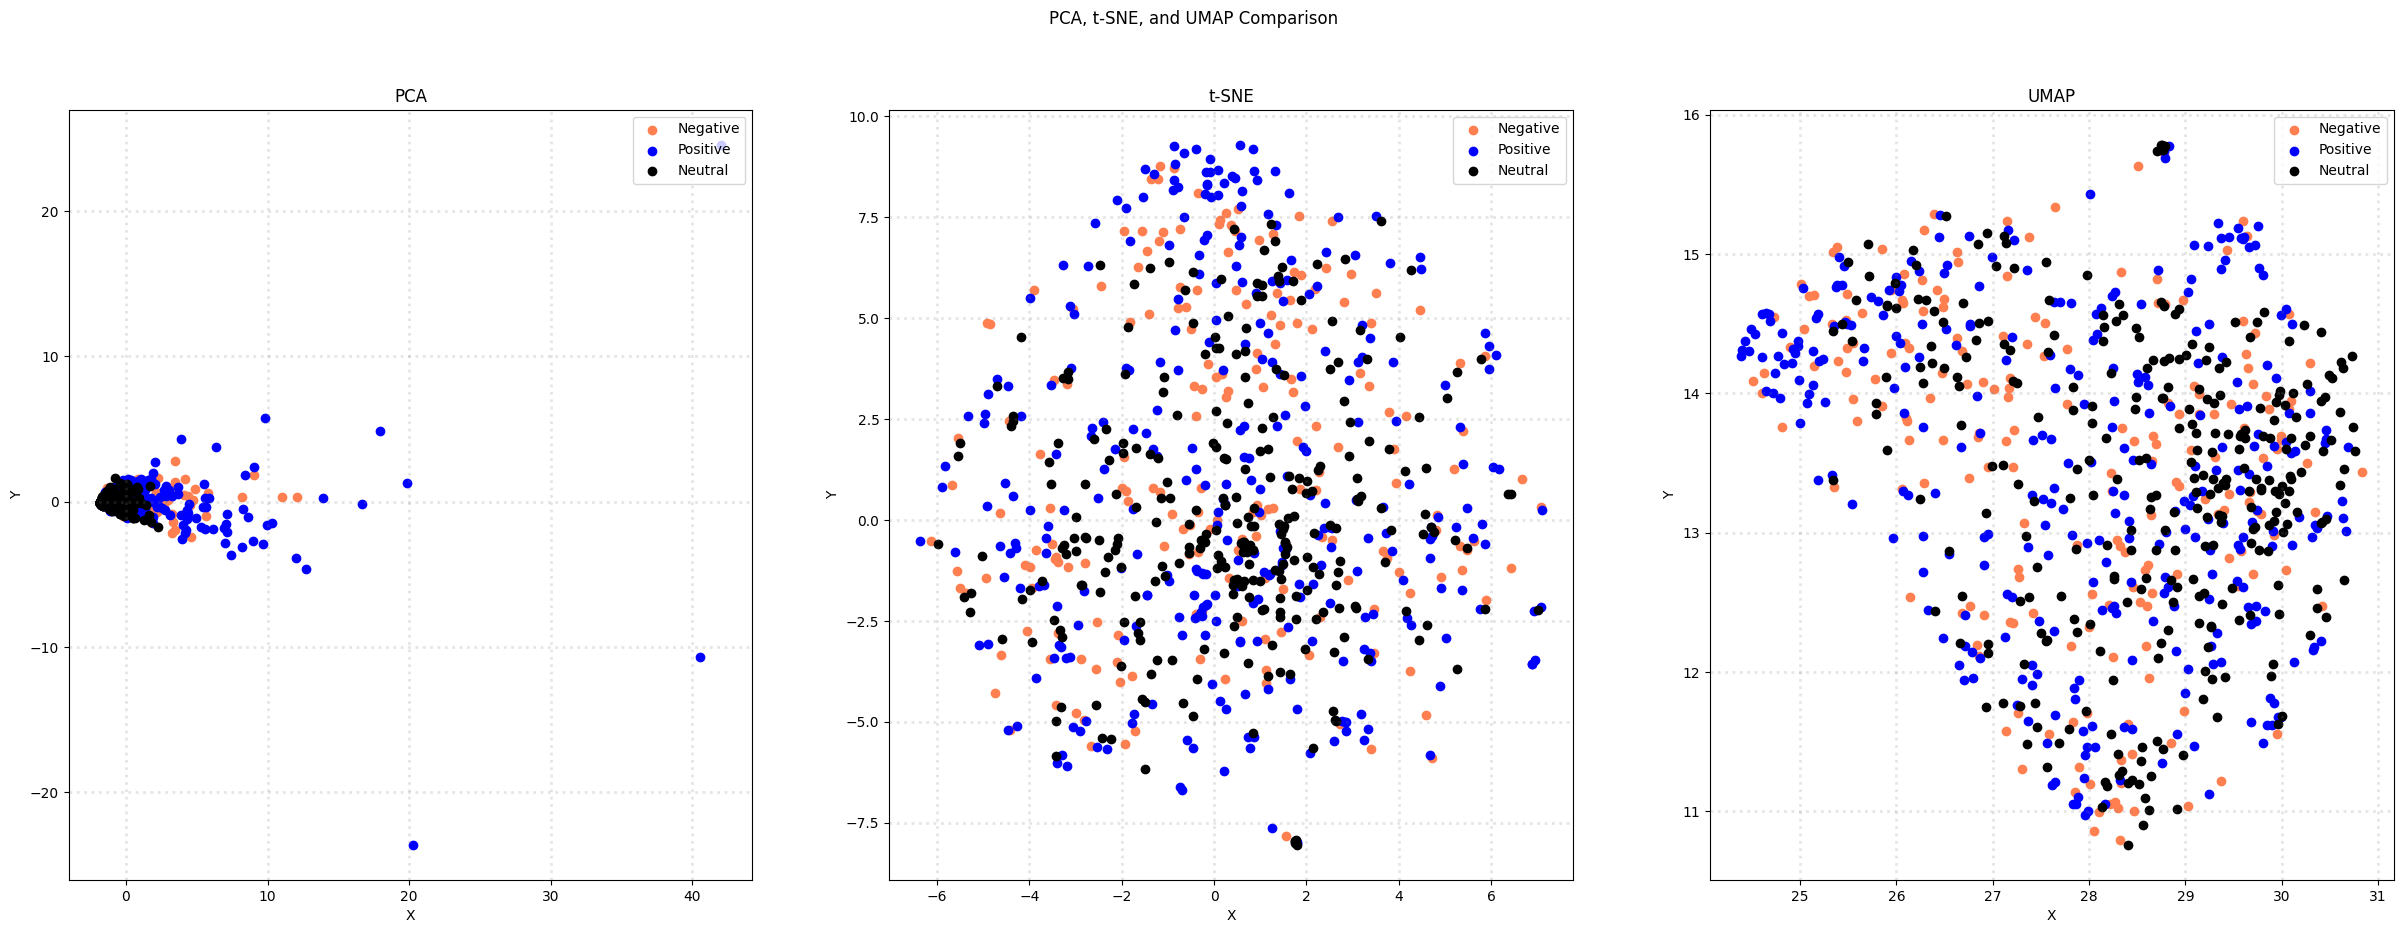

In [575]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

/Users/irene/Documents/Program/2025_Fall/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



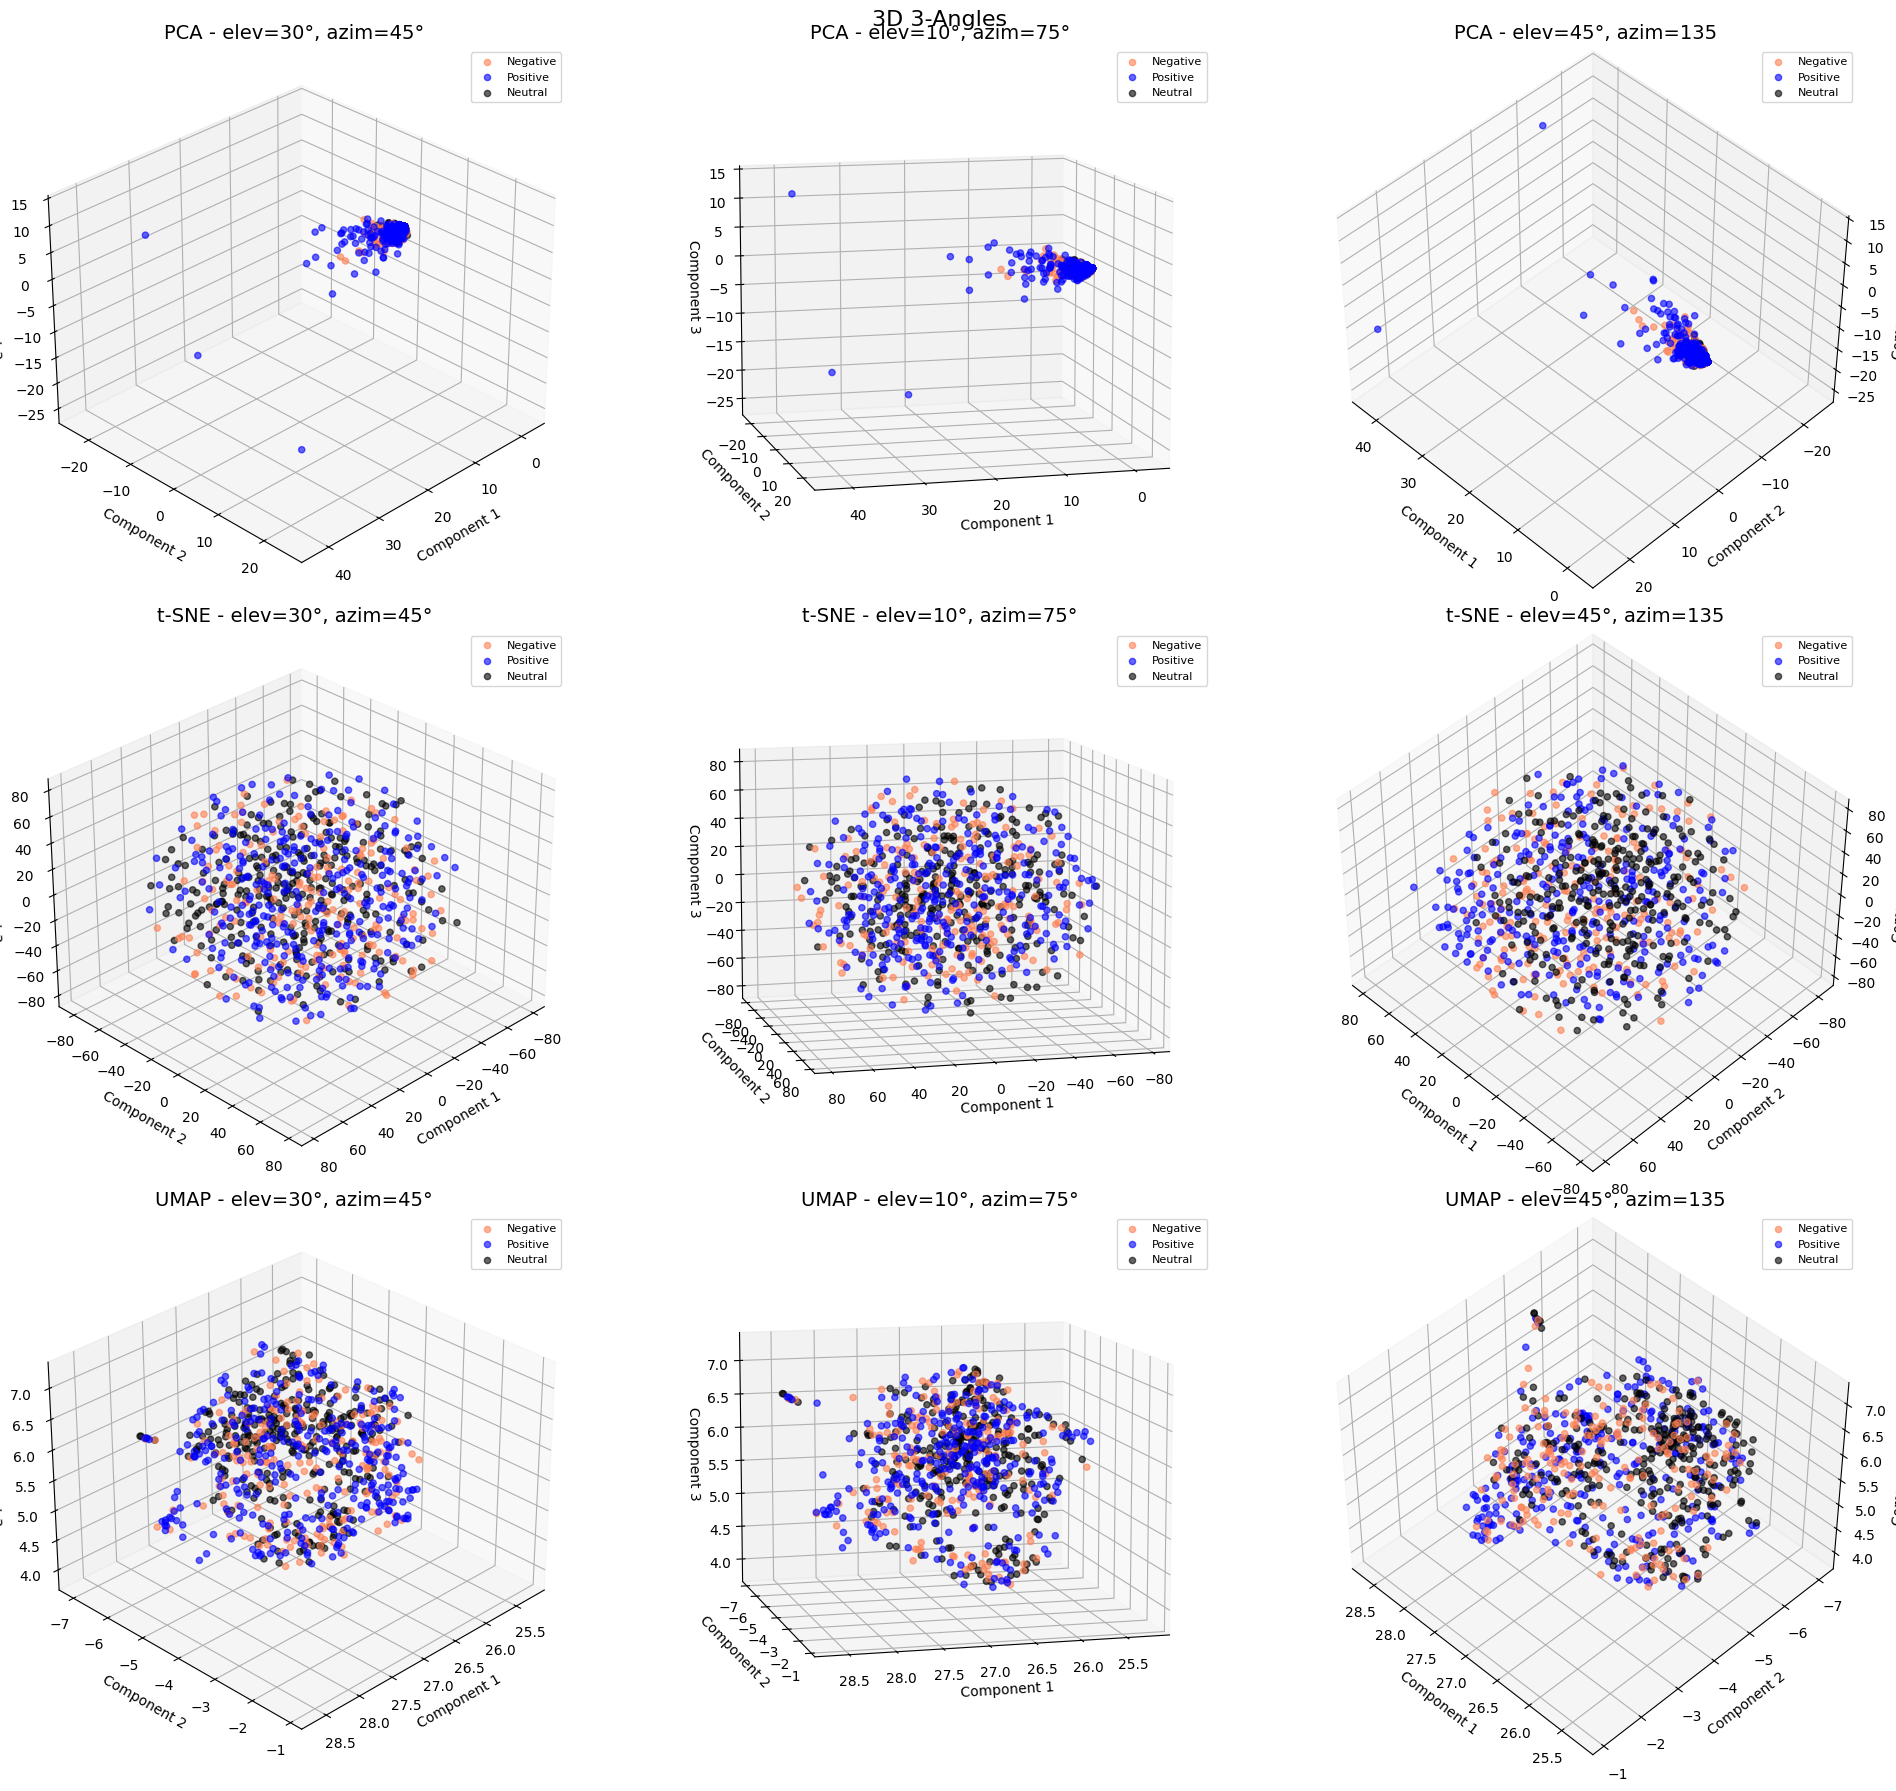

In [576]:
#Answer Here
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3, random_state=42).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(augmented_df.values)

# Define colors and categories
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# Function to create 3D scatter plot
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        mask = X['category_name'] == category
        xs = X_reduced[mask, 0]
        ys = X_reduced[mask, 1]
        zs = X_reduced[mask, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, alpha=0.6)
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Component 1', fontsize=10)
    ax.set_ylabel('Component 2', fontsize=10)
    ax.set_zlabel('Component 3', fontsize=10)
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

# Create 3x3 subplot for 3 methods × 3 viewing angles
fig = plt.figure(figsize=(20, 18))
fig.suptitle('3D 3-Angles', fontsize=16)

# Camera position: (elevation, azimuth)
angles = [
    (30, 45, "elev=30°, azim=45°"),
    (10, 75, "elev=10°, azim=75°"),
    (45, 135, "elev=45°, azim=135")
]

# Plot PCA from 3 angles
for i, (elev, azim, angle_name) in enumerate(angles):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    plot_3d_scatter(ax, X_pca_aug_3d, f'PCA - {angle_name}')
    ax.view_init(elev=elev, azim=azim)

# Plot t-SNE from 3 angles
for i, (elev, azim, angle_name) in enumerate(angles):
    ax = fig.add_subplot(3, 3, i+4, projection='3d')
    plot_3d_scatter(ax, X_tsne_aug_3d, f't-SNE - {angle_name}')
    ax.view_init(elev=elev, azim=azim)

# Plot UMAP from 3 angles
for i, (elev, azim, angle_name) in enumerate(angles):
    ax = fig.add_subplot(3, 3, i+7, projection='3d')
    plot_3d_scatter(ax, X_umap_aug_3d, f'UMAP - {angle_name}')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()

### 5.6 Discretization and Binarization

In [577]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [578]:
mlb = preprocessing.LabelBinarizer()

In [579]:
mlb.fit(X.category)

LabelBinarizer()

In [580]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [581]:
X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category
0,Calls on retards,-1,Negative,"[Calls, on, retards]","{retards, Calls, on}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1,Positive,"[Stunt, as, in, like, why, did, they, even, ma...","{about, Stunt, a, even, should, ever, deal, po...","[0, 0, 1]"
2,Seeing lots of red in the ticker.,0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{lots, ticker., the, of, red, Seeing, in}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{limits, **Highlight, power, for, electric, un...","[0, 0, 1]"
4,He didn’t say thank you.,0,Neutral,"[He, didn, ’, t, say, thank, you, .]","{He, didn’t, you., say, thank}","[0, 1, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Positive,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{warm, wet, Hoping, tonight,, wish, puss, ejac...","[0, 0, 1]"
6,Trump will respond to china increasing their t...,-1,Negative,"[Trump, will, respond, to, china, increasing, ...","{personally, LOT, even, china, Trump, think, f...","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,1,Positive,"[Confirmed, not, a, trap, ., Its, been, like, ...","{mouth, months,, a, word, 2, for, we, this, by...","[0, 0, 1]"
8,Am I the only one seeing the cup & handle brea...,1,Positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{line, one, Perfectly, a, week, Follow, techni...","[0, 0, 1]"


### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [582]:
# Answer here
mlb.fit(X.category_name) # It work.
# The binarization using 'category_name' column produces the same result as using the 'category' column

LabelBinarizer()

In [583]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category,bin_category_name
0,Calls on retards,-1,Negative,"[Calls, on, retards]","{retards, Calls, on}","[1, 0, 0]","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1,Positive,"[Stunt, as, in, like, why, did, they, even, ma...","{about, Stunt, a, even, should, ever, deal, po...","[0, 0, 1]","[0, 0, 1]"
2,Seeing lots of red in the ticker.,0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{lots, ticker., the, of, red, Seeing, in}","[0, 1, 0]","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{limits, **Highlight, power, for, electric, un...","[0, 0, 1]","[0, 0, 1]"
4,He didn’t say thank you.,0,Neutral,"[He, didn, ’, t, say, thank, you, .]","{He, didn’t, you., say, thank}","[0, 1, 0]","[0, 1, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Positive,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{warm, wet, Hoping, tonight,, wish, puss, ejac...","[0, 0, 1]","[0, 0, 1]"
6,Trump will respond to china increasing their t...,-1,Negative,"[Trump, will, respond, to, china, increasing, ...","{personally, LOT, even, china, Trump, think, f...","[1, 0, 0]","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,1,Positive,"[Confirmed, not, a, trap, ., Its, been, like, ...","{mouth, months,, a, word, 2, for, we, this, by...","[0, 0, 1]","[0, 0, 1]"
8,Am I the only one seeing the cup & handle brea...,1,Positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{line, one, Perfectly, a, week, Follow, techni...","[0, 0, 1]","[0, 0, 1]"


# 6. Data Exploration

In [584]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [585]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
["I think it's actually illegal to say how I feel"]
['Found the killjoy.']


In [586]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [587]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.144338
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/452772485.py:17: Dep

### >>> **Exercise 20 (take home):**
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

In [588]:
#Answer
# Changing the texts reference for Text 1, Text 2, and Text 3
# X.iloc[155, 200, 450] for example
document_to_transform_1 = []
random_record_1 = X.iloc[155]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[200]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[450]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.025616
Cosine Similarity using count bw 1 and 3: 0.418017
Cosine Similarity using count bw 2 and 3: 0.075550
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/1184145824.py:49: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/1184145824.py:50: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/1184145824.py:51: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_41537/1184145824.py:53:

|                                          | [155, 200, 450] |
|------------------------------------------|-----------------|
| Cosine Similarity using count bw 1 and 2 | 0.025616        |
| Cosine Similarity using count bw 1 and 3 | 0.418017        |
| Cosine Similarity using count bw 2 and 3 | 0.07555         |
| Cosine Similarity using count bw 1 and 1 | 1               |
| Cosine Similarity using count bw 2 and 2 | 1               |
| Cosine Similarity using count bw 3 and 3 | 1               |


Cosine Similarity:

A higher Cosine Similarity score means the meaning was well preserved, and a lower score means the modification resulted in a significant change in content or context

# 7. Data Classification
- **Naive Bayes classifier**
- **70/30 split for the training and test set**

In [589]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [590]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [591]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [592]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5081967213114754

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5610    0.3433    0.4259        67
     Neutral     0.7105    0.3140    0.4355        86
    Positive     0.4485    0.8132    0.5781        91

    accuracy                         0.5082       244
   macro avg     0.5733    0.4901    0.4798       244
weighted avg     0.5717    0.5082    0.4861       244



### >>> **Exercise 21 (take home):**

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [593]:
#Answer
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

y_pred_aug = nb_classifier_aug.predict(X_test_aug)
print("Accuracy with Augmented Data:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report with Augmented Data:\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy with Augmented Data: 0.4959016393442623

Classification Report with Augmented Data:
               precision    recall  f1-score   support

    Negative     0.5227    0.3433    0.4144        67
     Neutral     0.6667    0.3023    0.4160        86
    Positive     0.4472    0.7912    0.5714        91

    accuracy                         0.4959       244
   macro avg     0.5455    0.4789    0.4673       244
weighted avg     0.5453    0.4959    0.4735       244



### >>> **Exercise 22 (take home):**
What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

In [594]:
#Answer
print("""
Differences between original TDM and augmented TDM:
      1. The augmented data model shows no improvement in overall accuracy compared to the original TDM model.
      2. "Positive" category is considered the least affected among the others.
""")


Differences between original TDM and augmented TDM:
      1. The augmented data model shows no improvement in overall accuracy compared to the original TDM model.
      2. "Positive" category is considered the least affected among the others.



|  |  |  |  |  |
|---|---|---|---|---|
| Original TDM Data |  |  |  |  |
| Classification Report: | precision | recall | f1-score | support |
| Negative | 0.561 | 0.3433 | 0.4259 | 67 |
| Neutral | 0.7105 | 0.314 | 0.4355 | 86 |
| Positive | 0.4485 | 0.8132 | 0.5781 | 91 |
| accuracy |  |  | 0.5082 | 244 |
| macro avg | 0.5733 | 0.4901 | 0.4798 | 244 |
| weighted avg | 0.5717 | 0.5082 | 0.4861 | 244 |
| Augmented TDM Data |  |  |  |  |
| Classification Report | precision | recall | f1-score | support |
| Negative | 0.5227 | 0.3433 | 0.4144 | 67 |
| Neutral | 0.6667 | 0.3023 | 0.416 | 86 |
| Positive | 0.4472 | 0.7912 | 0.5714 | 91 |
| accuracy |  |  | 0.4959 | 244 |
| macro avg | 0.5455 | 0.4789 | 0.4673 | 244 |
| weighted avg | 0.5453 | 0.4959 | 0.4735 | 244 |


### Decision Tree Classifier
- **70/30 split for the training and test set**

In [595]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5532786885245902

Classification Report:
               precision    recall  f1-score   support

    Negative     0.3696    0.2537    0.3009        67
     Neutral     0.6000    0.7674    0.6735        86
    Positive     0.5909    0.5714    0.5810        91

    accuracy                         0.5533       244
   macro avg     0.5202    0.5309    0.5185       244
weighted avg     0.5333    0.5533    0.5367       244



### >>> **Exercise 23 (take home):**

Why do you think the performance of Decision Trees is lower/ higher than that of Naive Bayes? Provide possible reasons.

In [596]:
#Answer
print("""
In new dataset, the performance of decision trees is higher than that of naive bayes.
And Naive Bayes does NOT show the better choice overall.
      
      - Naive Bayes is often better for text classification because its simplifying assumptions actually work well with the high-dimensional, sparse nature of text data. 

      - Decision Trees are better suited for lower-dimensional data with meaningful feature interactions.
      
""")


In new dataset, the performance of decision trees is higher than that of naive bayes.
And Naive Bayes does NOT show the better choice overall.
      
      - Naive Bayes is often better for text classification because its simplifying assumptions actually work well with the high-dimensional, sparse nature of text data. 

      - Decision Trees are better suited for lower-dimensional data with meaningful feature interactions.
      



### >>> **Exercise 24 (take home):**

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [597]:
#Answer
print("""
By using the augmented data, performance not improvement compared to that obtained with the original TDM

However, the performance of both models is relatively LOW, so the so-called "outperformance" does not necessarily mean that the two model have significant differences.
      
In this case, decision trees MAY be able to capture more complex patterns in the data that naive bayes misses. 

As we can say, it depends on the specific dataset and task.
""")


By using the augmented data, performance not improvement compared to that obtained with the original TDM

However, the performance of both models is relatively LOW, so the so-called "outperformance" does not necessarily mean that the two model have significant differences.
      
In this case, decision trees MAY be able to capture more complex patterns in the data that naive bayes misses. 

As we can say, it depends on the specific dataset and task.



### >>> **Exercise 25 (take home):**

In your opinion, how should one choose the best model for a given task, such as the classification example above?

In [598]:
#Answer
print("""
For Chosing the best model for text classification tasks:
      
1. Starting with simple models like Naive Bayes or Logistic Regression as baselines.
2. Establishing a baseline performance.
3. Experimenting with more complex models like Decision Trees, Random Forests, or Gradient Boosting Machines.    
4. Comparing model performances on the same validation set.
5. Tuning hyperparameters for each model with gridsearch or random search to optimize performance.
6. Evaluating models using cross-validation to ensure robustness.
7. Analyzing feature importance to understand which features contribute most to predictions, and also where the weaknesses of the models.
8. Considering ensemble methods to combine strengths of multiple models by voting, weighting, or stacking.
9. Continuously iterating based on performance metrics and error analysis.
""")


For Chosing the best model for text classification tasks:
      
1. Starting with simple models like Naive Bayes or Logistic Regression as baselines.
2. Establishing a baseline performance.
3. Experimenting with more complex models like Decision Trees, Random Forests, or Gradient Boosting Machines.    
4. Comparing model performances on the same validation set.
5. Tuning hyperparameters for each model with gridsearch or random search to optimize performance.
6. Evaluating models using cross-validation to ensure robustness.
7. Analyzing feature importance to understand which features contribute most to predictions, and also where the weaknesses of the models.
8. Considering ensemble methods to combine strengths of multiple models by voting, weighting, or stacking.
9. Continuously iterating based on performance metrics and error analysis.



## TF-IDF Features and Naive Bayes Classification

    TF-IDF = TF × IDF

        TF  = (times word appears in document)
        IDF = log(total documents / documents containing word)

1. Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency)

2. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. 

3. Comment on the differences and when using augmentation with feature pattern

In [599]:
# Create TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()  
X_tfidf = tfidf_vect.fit_transform(X['text'])  # Transform the text data into TF-IDF features
tfidf_terms = tfidf_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the TF-IDF matrix to a DataFrame for easy merging
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_terms, index=X.index)

# Concatenate the original TF-IDF and the pattern matrix to augment the features
augmented_tfidf_df = pd.concat([tfidf_df, pattern_matrix], axis=1) 
augmented_tfidf_df

,00,000,01378,02,027,03,06,08,10,100,...,little,inflation,worth,whole,take,recently,next,debt,cash,retard
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [600]:
print(f"TF-IDF Matrix shape: {tfidf_df.shape}")
print(f"\nSample TF-IDF values:")
print(tfidf_df.iloc[:5, :5])

print("\nComparison with Term Frequency:")
print(f"\nTerm Frequency Matrix shape: {tdm_df.shape}")
print(tdm_df.iloc[:5, :5])

TF-IDF Matrix shape: (813, 4313)

Sample TF-IDF values:
    00  000  01378   02  027
0  0.0  0.0    0.0  0.0  0.0
1  0.0  0.0    0.0  0.0  0.0
2  0.0  0.0    0.0  0.0  0.0
3  0.0  0.0    0.0  0.0  0.0
4  0.0  0.0    0.0  0.0  0.0

Comparison with Term Frequency:

Term Frequency Matrix shape: (813, 4313)
   00  000  01378  02  027
0   0    0      0   0    0
1   0    0      0   0    0
2   0    0      0   0    0
3   0    0      0   0    0
4   0    0      0   0    0


In [601]:
# Implement Naive Bayes classifier using TF-IDF features. 
# Use 70/30 train-test split.
# Need a different NB variant for TF-IDF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier_tfidf = GaussianNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions on the test set
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy with TF-IDF:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nClassification Report with TF-IDF:\n", classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

Accuracy with TF-IDF: 0.5655737704918032

Classification Report with TF-IDF:
               precision    recall  f1-score   support

    Negative     0.5000    0.2985    0.3738        67
     Neutral     0.8837    0.4419    0.5891        86
    Positive     0.4969    0.8791    0.6349        91

    accuracy                         0.5656       244
   macro avg     0.6269    0.5398    0.5326       244
weighted avg     0.6341    0.5656    0.5471       244



In [602]:
# Use the augmented data to perform classification using Naive Bayes
from sklearn.naive_bayes import GaussianNB
 
X_train_aug_tfidf, X_test_aug_tfidf, y_train_aug_tfidf, y_test_aug_tfidf = train_test_split(augmented_tfidf_df, X['category'], test_size=0.3, random_state=42)  

nb_classifier_aug_tfidf = GaussianNB()
nb_classifier_aug_tfidf.fit(X_train_aug_tfidf, y_train_aug_tfidf)

y_pred_aug_tfidf = nb_classifier_aug_tfidf.predict(X_test_aug_tfidf)
print("Accuracy with Augmented TF-IDF:", accuracy_score(y_test_aug_tfidf, y_pred_aug_tfidf))
print("\nClassification Report with Augmented TF-IDF:\n", classification_report(y_test_aug_tfidf, y_pred_aug_tfidf, target_names=target_names, digits=4))

Accuracy with Augmented TF-IDF: 0.5778688524590164

Classification Report with Augmented TF-IDF:
               precision    recall  f1-score   support

    Negative     0.5385    0.3134    0.3962        67
     Neutral     0.9487    0.4302    0.5920        86
    Positive     0.5000    0.9121    0.6459        91

    accuracy                         0.5779       244
   macro avg     0.6624    0.5519    0.5447       244
weighted avg     0.6687    0.5779    0.5583       244



In [603]:
print(f"Term Frequency Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

print(f"TF-IDF Accuracy: {accuracy_score(y_test_tfidf, y_pred_tfidf):.4f}")
print(classification_report(y_test_tfidf, y_pred_tfidf))

print(f"Augmented Term Frequency Accuracy: {accuracy_score(y_test_aug, y_pred_aug):.4f}")
print(classification_report(y_test_aug, y_pred_aug))

print(f"Augmented TF-IDF Accuracy: {accuracy_score(y_test_aug_tfidf, y_pred_aug_tfidf):.4f}")
print(classification_report(y_test_aug_tfidf, y_pred_aug_tfidf))

Term Frequency Accuracy: 0.5082
              precision    recall  f1-score   support

          -1       0.56      0.34      0.43        67
           0       0.71      0.31      0.44        86
           1       0.45      0.81      0.58        91

    accuracy                           0.51       244
   macro avg       0.57      0.49      0.48       244
weighted avg       0.57      0.51      0.49       244

TF-IDF Accuracy: 0.5656
              precision    recall  f1-score   support

          -1       0.50      0.30      0.37        67
           0       0.88      0.44      0.59        86
           1       0.50      0.88      0.63        91

    accuracy                           0.57       244
   macro avg       0.63      0.54      0.53       244
weighted avg       0.63      0.57      0.55       244

Augmented Term Frequency Accuracy: 0.4959
              precision    recall  f1-score   support

          -1       0.52      0.34      0.41        67
           0       0.67      0.

Comment on the differences and when using augmentation with feature pattern:

- Term frequency with augmentation: slighly lowering the performance

- TF-IDF with augmentation: slightly improving
    - "Neutral" category shows much significant improvement than others

Categories patterns:

Negative(-1) --> all methods with low performance, suggesting these examples are underrepresented or harder to distinguish

Neutral(0) --> benefit from TF-IDF the most, which helps the model better identify neutral cases

Positive(1) --> with higher performance in all methods, which indicates augmented TF-IDF covering most of its patterns



## Fourth: Inefficiencies and Improvements

What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

Inefficent parts:

1. Text preprocessing:
   Using basic tokenization only, but there's still so much more. For example: 
   - apply "stopword removal" to decerease noise ("the", "a", "is"...)
   - URLs and special characters are included, which is away from the core meanings in the text

2. Features extraction:
   Creating full term-document matrices, which needs to repeat vectorization for each different task, and wasteful(memory).

3. Text frequence pattern mining:
   Pattern features add present/absent only ,and there is no specific function to do on redundant ones
___

Improvements:

1. Add basic text preprocessing (lowercase, remove URLs)
2. Extract Domain-specific features
3. Keep matrix sparse to save memory and runtime

